Лабораторная работа №3 студента группы М8О-406Б-18 Кузьмичева Александра

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

In [ ]:
csv_path = '/content/drive/My Drive/house_prices/train.csv'
data = pd.read_csv(csv_path)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.shape

(1460, 81)

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
from sklearn.model_selection import train_test_split

data = data.drop(columns=["Id"])

data = data.fillna(data.mean())

y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

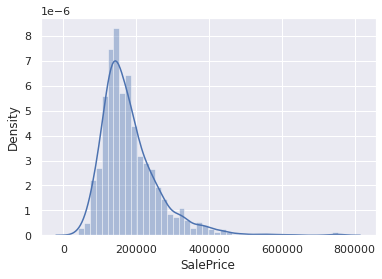

In [ ]:
sns.distplot(y_train)

In [ ]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) на числовых признаках из нашего датасета

from sklearn import linear_model

numeric_features = [
    'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
    'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
    'MiscVal', 'MoSold', 'YrSold',
]

X_train_num, y_train_num = X_train[numeric_features], y_train
X_test_num, y_test_num = X_test[numeric_features], y_test

def score_model(model):
    model.fit(X_train_num, y_train_num)
    return model.score(X_test_num, y_test_num)

model = linear_model.LinearRegression()

print("No normalization:", score_model(model))
print("L1 normalization:", score_model(linear_model.Lasso()))
print("L2 normalization:", score_model(linear_model.Ridge()))

No normalization: 0.7901752237525208
L1 normalization: 0.7901977793405417
L2 normalization: 0.7905793751636612


$$\text{RMSE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} (y_i - a(x_i))^2}$$

In [ ]:
# Определите RMSE через функцию sklearn.metrics.make_scorer

from sklearn.metrics import make_scorer
def calc_rmse(y, y_pred, **kwargs):
    return np.sqrt( np.mean( np.square(y - y_pred) ) )
rmse_scorer = make_scorer(calc_rmse, greater_is_better=False)

In [ ]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

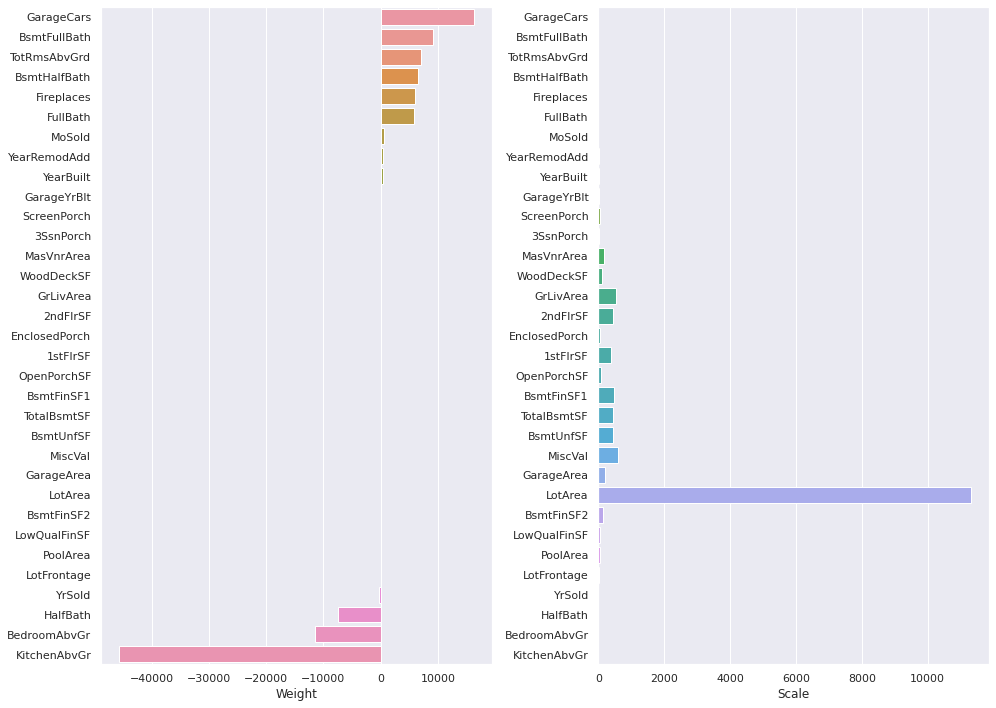

In [ ]:
show_weights(numeric_features, model.coef_, X_train[numeric_features].std())

In [ ]:
# Отмасштабируйте признаки перед обучением модели, воспользуясь трансформером StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train_num)
X_train_scaled = scaler.transform(X_train_num)
X_test_scaled  = scaler.transform(X_test_num)

model.fit(X_train_scaled, y_train_num)
model.score(X_test_scaled, y_test_num)

0.7904689891911441

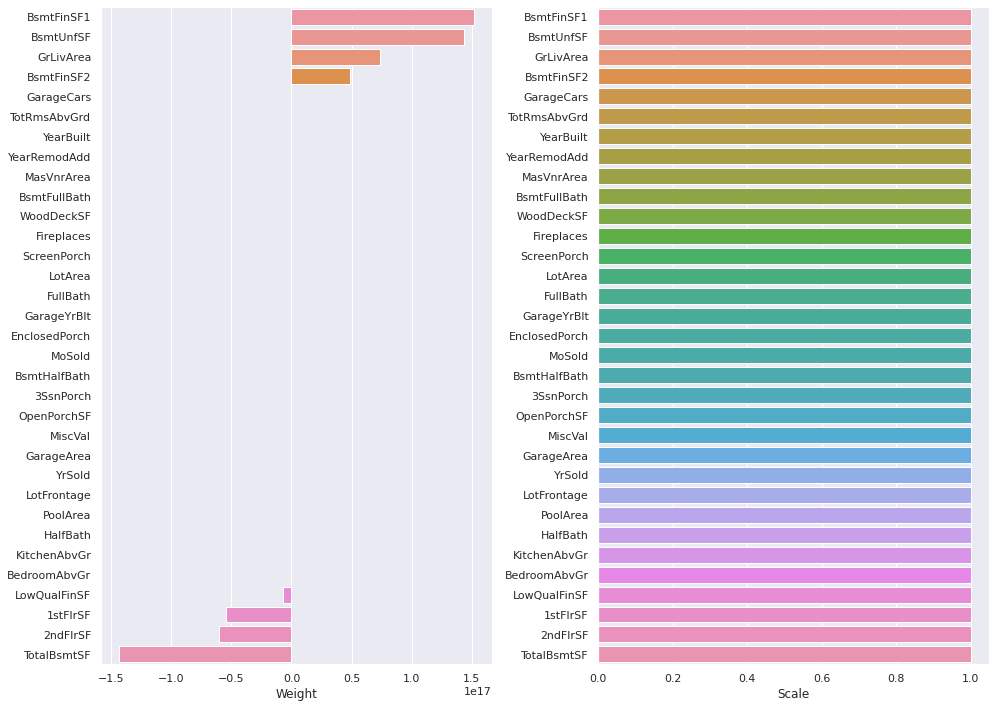

In [ ]:
scales = pd.Series(data=X_train_scaled.std(axis=0), index=numeric_features)
show_weights(numeric_features, model.coef_, scales)

In [ ]:
# Подберите коэффициент регуляризации alpha, воспользуясь GridSearchCV

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(linear_model.Ridge(),
                           {'alpha': np.arange(0.5, 100.1, 0.5)},
                           scoring=rmse_scorer,
                           verbose=3)

grid_search.fit(X_train_scaled, y_train_num)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END ....................alpha=0.5;, score=-45811.718 total time=   0.0s
[CV 2/5] END ....................alpha=0.5;, score=-33195.220 total time=   0.0s
[CV 3/5] END ....................alpha=0.5;, score=-62375.629 total time=   0.0s
[CV 4/5] END ....................alpha=0.5;, score=-53777.374 total time=   0.0s
[CV 5/5] END ....................alpha=0.5;, score=-32397.382 total time=   0.0s
[CV 1/5] END ....................alpha=1.0;, score=-45813.920 total time=   0.0s
[CV 2/5] END ....................alpha=1.0;, score=-33194.221 total time=   0.0s
[CV 3/5] END ....................alpha=1.0;, score=-62350.893 total time=   0.0s
[CV 4/5] END ....................alpha=1.0;, score=-53762.180 total time=   0.0s
[CV 5/5] END ....................alpha=1.0;, score=-32389.888 total time=   0.0s
[CV 1/5] END ....................alpha=1.5;, score=-45816.137 total time=   0.0s
[CV 2/5] END ....................alpha=1.5;, 

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([  0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,
         5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,
         9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,
        14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,  18. ,
        18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,  22.5,
        23. ,  23.5,  24. ,  24.5,  25. ,  25.5,  26. ,  26.5,  27. ,
        27.5,  28. ,  28.5,  29. ,  29.5,  30. ,  30.5,  31. ,  31.5,
        32. ,  32.5,  33. ,  33.5,  34. ,  34.5,...
        68. ,  68.5,  69. ,  69.5,  70. ,  70.5,  71. ,  71.5,  72. ,
        72.5,  73. ,  73.5,  74. ,  74.5,  75. ,  75.5,  76. ,  76.5,
        77. ,  77.5,  78. ,  78.5,  79. ,  79.5,  80. ,  80.5,  81. ,
        81.5,  82. ,  82.5,  83. ,  83.5,  84. ,  84.5,  85. ,  85.5,
        86. ,  86.5,  87. ,  87.5,  88. ,  88.5,  89. ,  89.5,  90. ,
        90.5,  91. ,  91.5,  92. ,  92.5, 

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

grid_search.score(X_test_scaled, y_test_num)

{'alpha': 100.0}
-44430.04325930365
Ridge(alpha=100.0)


-34745.77005534508

In [ ]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) с подобранным коэффициентом регуляризации на числовых признаках из нашего датасета, воспользуясь классом Pipeline (не забывать про мастабирование признаков через StandardScaler)

from sklearn.pipeline import Pipeline
model = Pipeline([('scaler', StandardScaler()), ('ridge', linear_model.Ridge(alpha=100.0))])
model.fit(X_train_num, y_train_num)
model.score(X_test_num, y_test_num)

0.7939259734317223

In [ ]:
categorical = list(set(X_train.columns) - set(numeric_features))
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [ ]:
# Закодируйте категориальные признаки числами с помощью OneHotEncoder и обучите модели на всех признаках

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

def create_col_tf():
    return ColumnTransformer(
           [('scale', StandardScaler(), list(map(lambda x : X_train.columns.get_loc(x), numeric_features))),
            ('encode', OneHotEncoder(), list(map(lambda x : X_train.columns.get_loc(x), categorical)))])

column_transformer = create_col_tf()

column_transformer.fit(X_train)

ColumnTransformer(transformers=[('scale', StandardScaler(),
                                 [2, 3, 18, 19, 25, 33, 35, 36, 37, 42, 43, 44,
                                  45, 46, 47, 48, 49, 50, 51, 53, 55, 58, 60,
                                  61, 65, 66, 67, 68, 69, 70, ...]),
                                ('encode', OneHotEncoder(),
                                 [15, 59, 17, 27, 0, 28, 16, 5, 52, 1, 8, 10,
                                  38, 54, 24, 20, 22, 31, 63, 73, 32, 14, 71,
                                  72, 7, 26, 64, 40, 57, 34, ...])])

In [ ]:
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", column_transformer.transform(X_train).shape)

Size before OneHot: (1022, 79)
Size after OneHot: (1022, 322)


In [ ]:
# Обучите линейную регрессию с l1 и l2 регуляризаторами

lasso_pipeline = Pipeline([('transformer', create_col_tf()), ('lasso', linear_model.Lasso())])
pipeline = Pipeline([('transformer', create_col_tf()), ('ridge', linear_model.Ridge())])

try:
    pipeline.fit(X_train, y_train)
    pipeline.score(X_test, y_test)
except ValueError as e:
    print(e)

Found unknown categories [1] in column 2 during transform


In [ ]:
def print_unique_values(X_tr, X_ts, cols):
    max_len = max(map(lambda x : len(x), cols))
    max_len

    for c in cols:
        X_tr_unique = set(X_tr[c].unique())
        temp = X_ts[c].unique()
        X_ts_unique = set(temp)
        unique = X_ts_unique - X_tr_unique

        if len(unique) > 0:
            print(f"{c:<{max_len}s} : {unique}")

def move_unique_to_train(X_tr, y_tr, X_ts, y_ts, cols):
    X_tr = X_tr.copy()
    y_tr = y_tr.copy()
    X_ts = X_ts.copy()
    y_ts = y_ts.copy()

    for c in cols:
        X_tr_unique = set(X_tr[c].unique())
        X_ts_unique = set(X_ts[c].unique())
        to_move = X_ts_unique - X_tr_unique

        idx_to_move = X_ts[c].isin(to_move)

        X_tr = X_tr.append(X_ts.loc[idx_to_move])
        y_tr = y_tr.append(y_ts.loc[idx_to_move])
        X_ts.drop(X_ts.index[idx_to_move], inplace=True)
        y_ts.drop(y_ts.index[idx_to_move], inplace=True)

    return X_tr, y_tr, X_ts, y_ts

print("Unique values per column before fix:")
print_unique_values(X_train, X_test, categorical)

X_train_1, y_train_1, X_test_1, y_test_1 = move_unique_to_train(X_train, y_train, X_test, y_test, categorical)

print("\nUnique values per column after fix:")
print_unique_values(X_train_1, X_test_1, categorical)

Unique values per column before fix:
OverallCond   : {1}
OverallQual   : {1, 2}
Functional    : {'Sev'}
Exterior1st   : {'CBlock'}
MiscFeature   : {'TenC'}
PoolQC        : {'Fa'}
Electrical    : {'NotGiven'}
Exterior2nd   : {'CBlock'}
RoofMatl      : {'Metal', 'Roll', 'Membran'}
HeatingQC     : {'Po'}

Unique values per column after fix:


In [ ]:
pipeline.fit(X_train_1, y_train_1)
lasso_pipeline.fit(X_train_1, y_train_1)

print("Lasso score:", lasso_pipeline.score(X_test_1, y_test_1))
print("Ridge score:", pipeline.score(X_test_1, y_test_1))

Lasso score: 0.8980739664736797
Ridge score: 0.8908827164936856


In [ ]:
lasso_zeros = np.sum(lasso_pipeline.steps[-1][-1].coef_ == 0)
ridge_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)

print("Zero weights in Lasso:", lasso_zeros)
print("Zero weights in Ridge:", ridge_zeros)

Zero weights in Lasso: 42
Zero weights in Ridge: 0


In [ ]:
# Подберите коэффициент регуляризации для всех моделей, воспользуясь GridSearchCV

def get_best_param(model, param_grid):
    column_transformer = create_col_tf()
    X_tr = column_transformer.fit_transform(X_train_1)

    grid_search = GridSearchCV(model,
                               param_grid,
                               scoring=rmse_scorer,
                               verbose=3)
    grid_search.fit(X_tr, y_train_1)

    print(grid_search.best_estimator_)
    print(grid_search.best_score_)

    return grid_search.best_params_

best_param = get_best_param(linear_model.Ridge(),
                            {'alpha': np.arange(1.0, 16.1, 0.5)},)
pipeline = Pipeline( [
                     ('transformer', create_col_tf()),
                     ('ridge', linear_model.Ridge(**best_param))] )
pipeline.fit(X_train_1, y_train_1)

Fitting 5 folds for each of 31 candidates, totalling 155 fits
[CV 1/5] END ....................alpha=1.0;, score=-35406.484 total time=   0.1s
[CV 2/5] END ....................alpha=1.0;, score=-29215.616 total time=   0.0s
[CV 3/5] END ....................alpha=1.0;, score=-52318.251 total time=   0.1s
[CV 4/5] END ....................alpha=1.0;, score=-45745.822 total time=   0.0s
[CV 5/5] END ....................alpha=1.0;, score=-34540.427 total time=   0.1s
[CV 1/5] END ....................alpha=1.5;, score=-35693.606 total time=   0.1s
[CV 2/5] END ....................alpha=1.5;, score=-28326.740 total time=   0.0s
[CV 3/5] END ....................alpha=1.5;, score=-51856.409 total time=   0.1s
[CV 4/5] END ....................alpha=1.5;, score=-45581.950 total time=   0.1s
[CV 5/5] END ....................alpha=1.5;, score=-33126.612 total time=   0.1s
[CV 1/5] END ....................alpha=2.0;, score=-35950.398 total time=   0.1s
[CV 2/5] END ....................alpha=2.0;, sc

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  [2, 3, 18, 19, 25, 33, 35, 36,
                                                   37, 42, 43, 44, 45, 46, 47,
                                                   48, 49, 50, 51, 53, 55, 58,
                                                   60, 61, 65, 66, 67, 68, 69,
                                                   70, ...]),
                                                 ('encode', OneHotEncoder(),
                                                  [15, 59, 17, 27, 0, 28, 16, 5,
                                                   52, 1, 8, 10, 38, 54, 24, 20,
                                                   22, 31, 63, 73, 32, 14, 71,
                                                   72, 7, 26, 64, 40, 57, 34, ...])])),
                ('ridge', Ridge(alpha=15.0))])

(0.0, 6.151300934470932e-10)

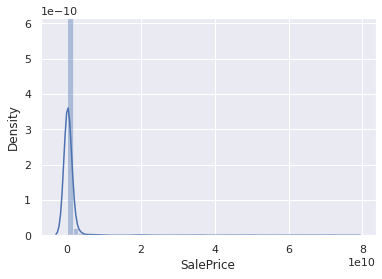

In [ ]:
error = (y_train_1 - pipeline.predict(X_train_1)) ** 2

ax = sns.distplot(error)
max_data = max([p.get_height() for p in ax.patches])
ax.set_ylim([0, max_data])

Выбросим примеры, остаток у которых больше 0.95-квантили.

In [ ]:
# Выбросите из обучающей выборки примеры, остаток у которых больше 0.95-квантили и переобучите модели 

def mask_quantile(error, quantile, bin_count):
    max = np.max(error)
    min = np.min(error)
    bins = np.linspace(min, max, bin_count)
    
    error_classes = np.digitize(error, bins)
    bin_nums, count_per_bin = np.unique(error_classes, return_counts=True)
    bin_sum = np.cumsum(count_per_bin)
    bin_percs = bin_sum / bin_sum[-1]
    
    fitting_bins = bin_nums[bin_percs < quantile]
    return np.isin(error_classes, fitting_bins)

mask = mask_quantile(error, 0.95, 4 * 13)

(0.0, 7.492727683578877e-09)

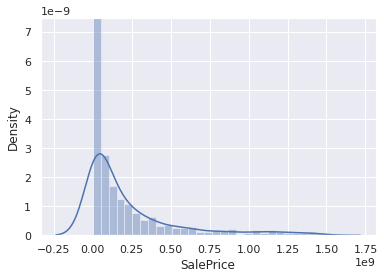

In [ ]:
error = (y_train_1[mask] - pipeline.predict(X_train_1[mask])) ** 2

ax = sns.distplot(error)
max_data = max([p.get_height() for p in ax.patches])
ax.set_ylim([0, max_data])

In [ ]:
# Получите скор по нашей метрике (RMSE) ниже значения 30000

y_pred = pipeline.predict(X_test_1)
calc_rmse(y_test_1, y_pred)

25512.249542599173